# Diamonds
Analyze diamonds by their cut, color, clarity, price, and other attributes

# 1) Importing key modules

In [1]:
#For avoiding warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor

In [4]:
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score

#Model helper
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# 2) Loading data

In [5]:
df = pd.read_csv("diamonds.csv", index_col=0)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 3) Getting to know data

In [7]:
df.shape

(53940, 10)

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
8       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10      0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
11      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
12      0.23      Ideal     J     VS1   62.8

In [10]:
df.dtypes.value_counts()

float64    6
object     3
int64      1
dtype: int64

In [11]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

In [12]:
table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
price,int64
carat,float64
depth,float64
table,float64
x,float64
y,float64
z,float64
cut,object
color,object
clarity,object


In [13]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

cut        5
color      7
clarity    8
dtype: int64

In [14]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

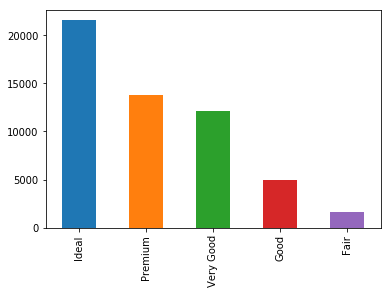

In [15]:
df['cut'].value_counts().plot.bar()

In [16]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

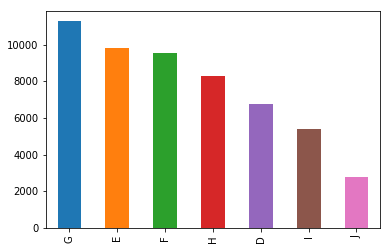

In [17]:
df['color'].value_counts().plot.bar()

In [18]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

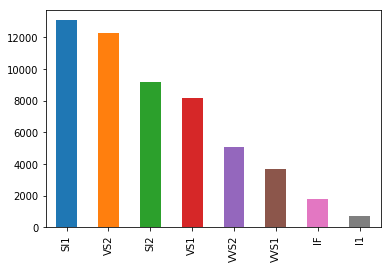

In [19]:
df['clarity'].value_counts().plot.bar()

# 4) Checking missing values

In [20]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [21]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'carat': 0,
 'cut': 0,
 'color': 0,
 'clarity': 0,
 'depth': 0,
 'table': 0,
 'price': 0,
 'x': 0,
 'y': 0,
 'z': 0}

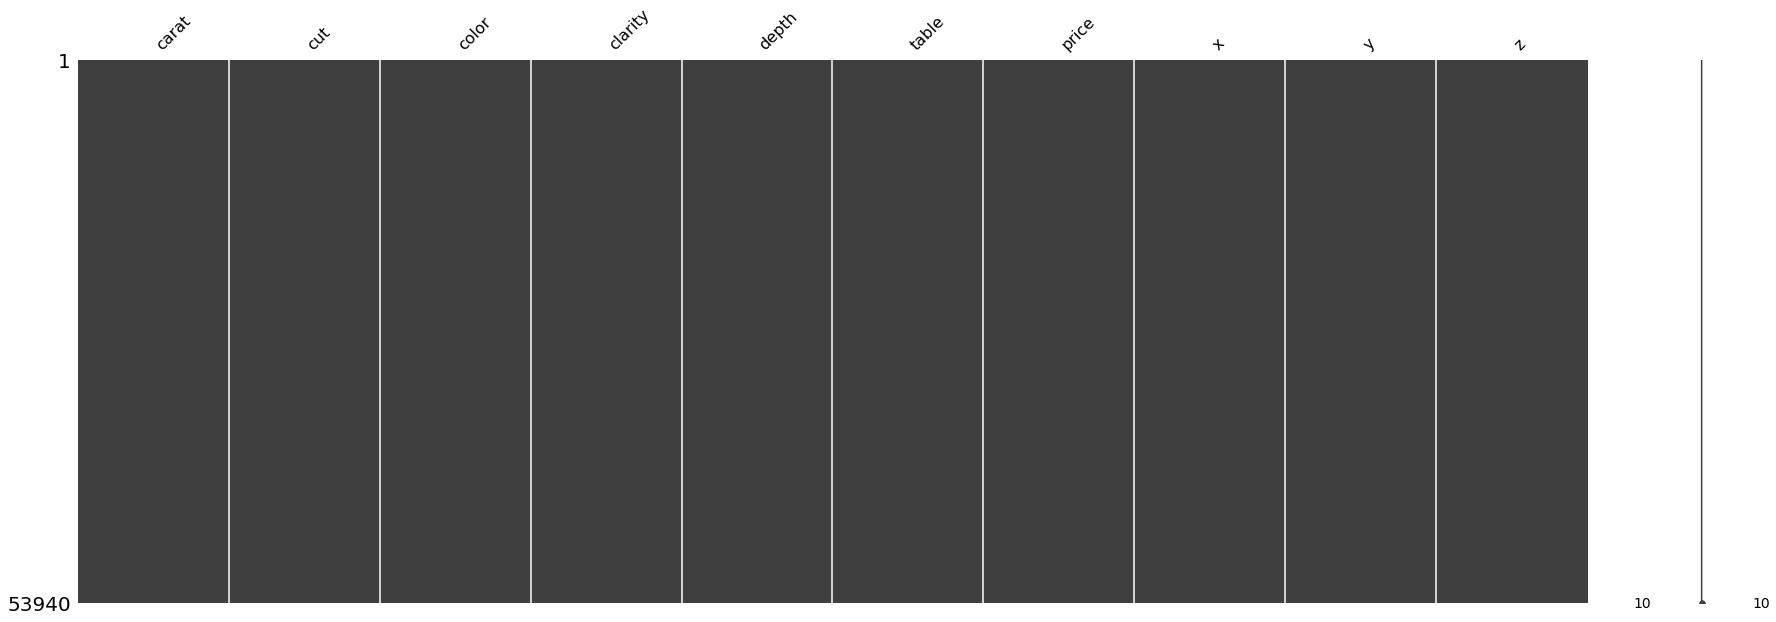

In [22]:
# Plot graphic of missing values
import missingno
missingno.matrix(df, figsize = (30,10))

**No missing value. Good to go**

# 5) Visualization Of All Features

### a) Carat

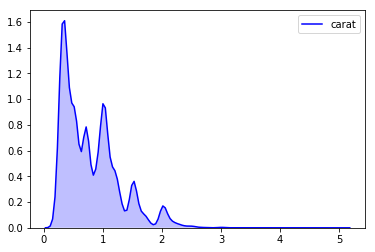

In [23]:
import seaborn as sns
sns.kdeplot(df['carat'], shade=True , color='b')

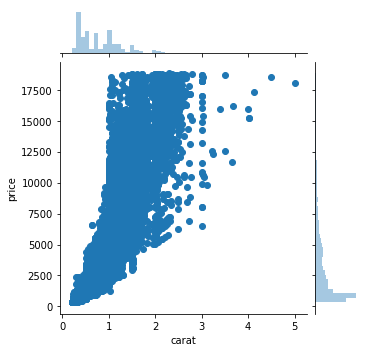

In [24]:
# Check how is it with dependant variable i.e price
sns.jointplot(x='carat' , y='price' , data=df , height=5)

It seems that Carat varies with Price Exponentially

### b) Cut

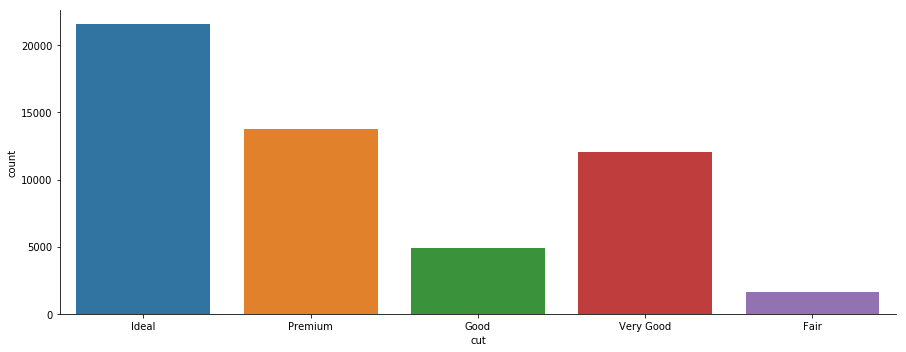

In [25]:
sns.catplot(x='cut', data=df , kind='count',aspect=2.5 )

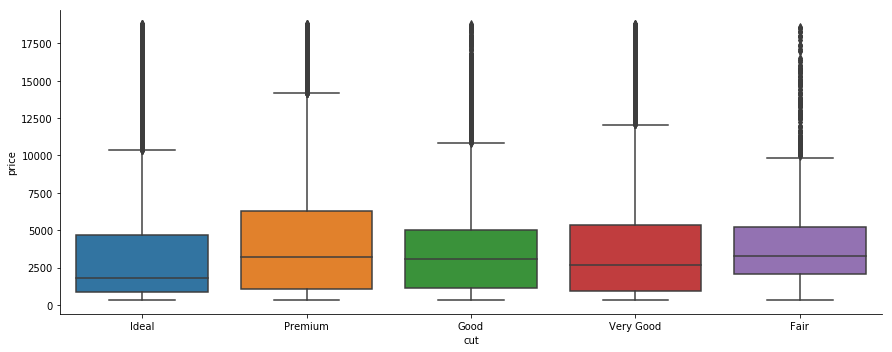

In [26]:
sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

The bottom line indicates the min value.
The upper line indicates the max value.
The middle line of the box is the median or the 50% percentile.
The side lines of the box are the 25 and 75 percentiles respectively.

- Note: Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut

### c) Color

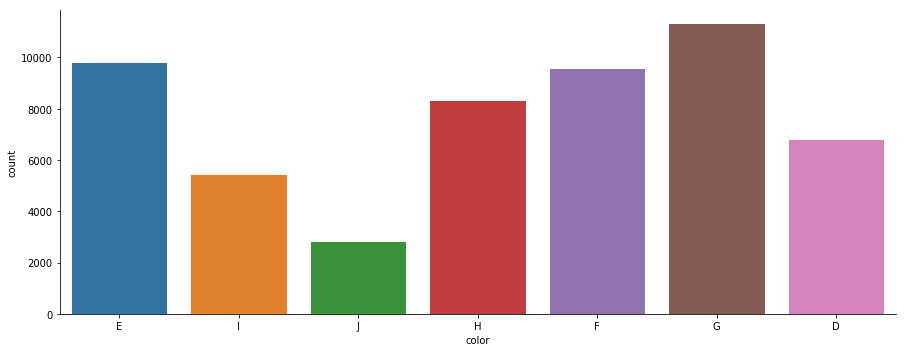

In [27]:
sns.catplot(x='color', data=df , kind='count',aspect=2.5 )

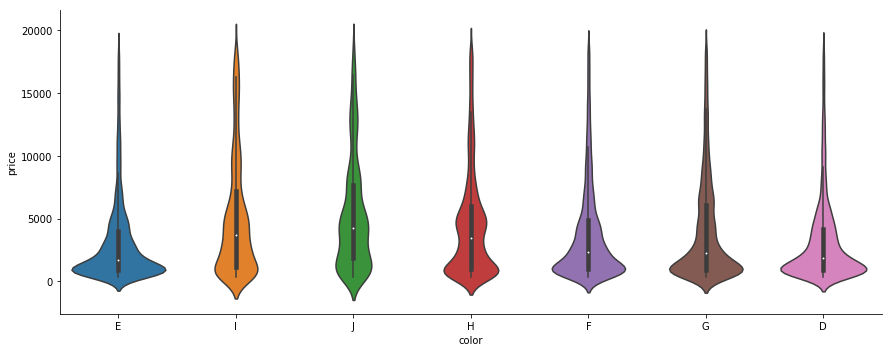

In [28]:
#Price vs color
sns.catplot(x='color', y='price' , data=df , kind='violin', aspect=2.5)

### d) Clarity

In [29]:
labels = df.clarity.unique().tolist()

In [30]:
sizes = df.clarity.value_counts().tolist()

In [31]:
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']

In [32]:
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)

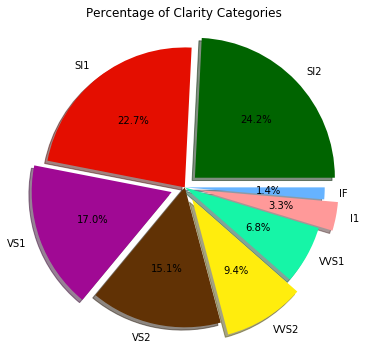

In [33]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

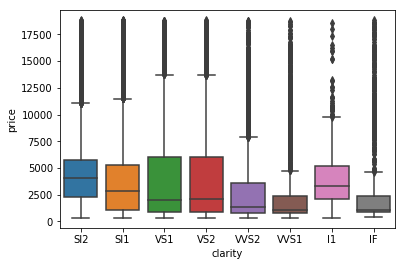

In [34]:
sns.boxplot(x='clarity', y='price', data=df )

It seems that VS1 and VS2 affect the Diamond's Price equally having quite high Price margin.

 ### e) Depth

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4260e+03, 5.0770e+03, 1.8246e+04, 2.2654e+04, 5.0380e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

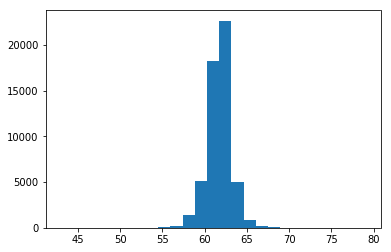

In [35]:
plt.hist('depth' , data=df , bins=25)

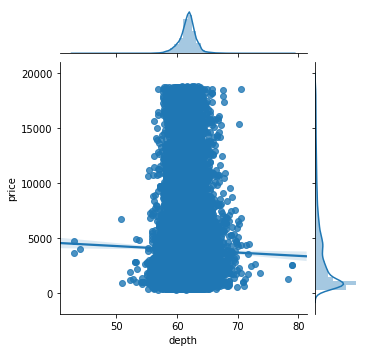

In [36]:
sns.jointplot(x='depth', y='price' , data=df , kind='regplot', height=5)

We can Infer from the plot that the Price can vary heavily for the same Depth.

### f) Table

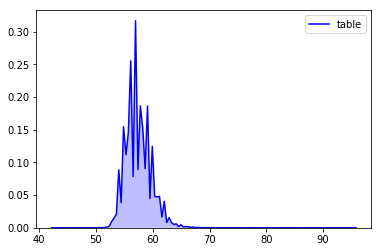

In [37]:
sns.kdeplot(df['table'] ,shade=True , color='b')

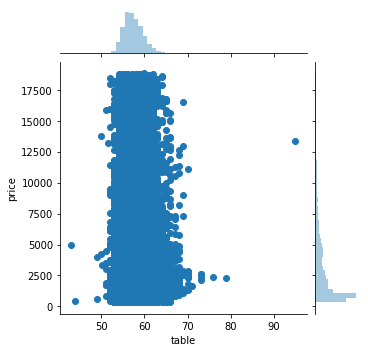

In [38]:
sns.jointplot(x='table', y='price', data=df , height=5)

### g) Dimensions

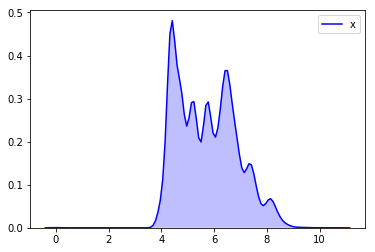

In [39]:
sns.kdeplot(df['x'] ,shade=True , color='b' )

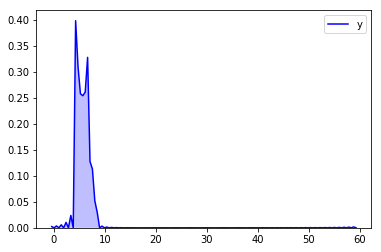

In [40]:
sns.kdeplot(df['y'] , shade=True , color='b' )

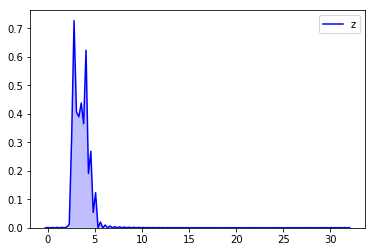

In [41]:
sns.kdeplot(df['z'] , shade=True , color='b' )

(2, 10)

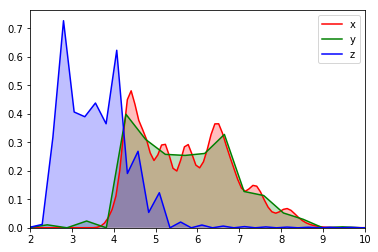

In [42]:
# All in one
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

# 6) Feature Engineering

In [43]:
# Create new feature "volume". As volume= b*w*h
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [44]:
#drop x,y,z as these features are extras
df.drop(['x','y','z'], axis=1, inplace= True)

### Histogram

(0, 50000)

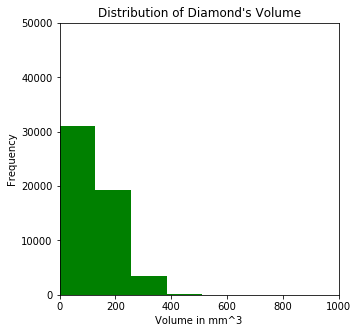

In [45]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

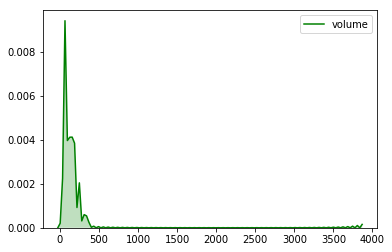

In [46]:
sns.kdeplot(df['volume'] ,shade=True , color='g' )

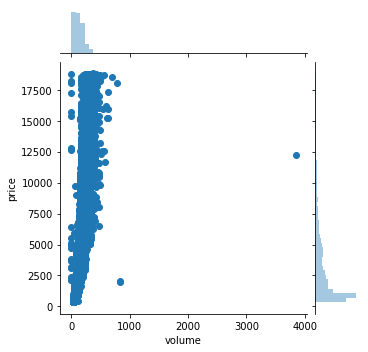

In [47]:
# now check with price
sns.jointplot(x='volume', y='price' , data=df, height=5)

# 7) Correlation Between Features

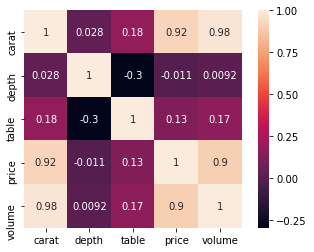

In [48]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

-  Self Relation ie. of a feature to itself is 1 as expected.
-  The Price of the Diamond is highly correlated to Carat, and its Dimensions. Also price is correlated to volume.
-   Depth is inversely related to Price

# 8) Dealing with categorical data

In [49]:
df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

int64 and float64 features are numeric variables (which can be either discrete or continuous).
object columns contain strings and are categorical features.

In [50]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

cut        5
color      7
clarity    8
dtype: int64

In [51]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### Encoding Categorical Variables

In [52]:
from sklearn.preprocessing import LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [53]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
1,0.23,2,1,3,61.5,55.0,326,38.202030
2,0.21,3,1,2,59.8,61.0,326,34.505856
3,0.23,1,1,4,56.9,65.0,327,38.076885
4,0.29,3,5,5,62.4,58.0,334,46.724580
5,0.31,1,6,3,63.3,58.0,335,51.917250


# 9) Outlier detection

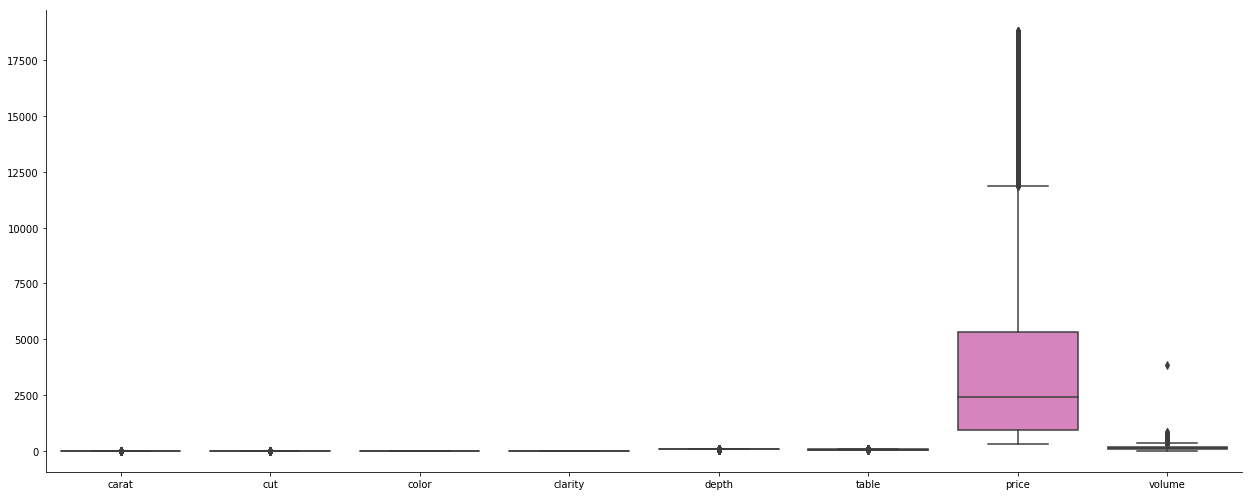

In [54]:
sns.catplot(data=df , kind='box' , height=7, aspect=2.5)


 mu = 3932.80 and sigma = 3989.40



Text(0.5, 1.0, 'Price of Diamond')

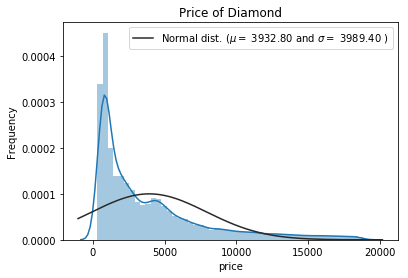

In [55]:
from scipy.stats import norm, skew
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price of Diamond')

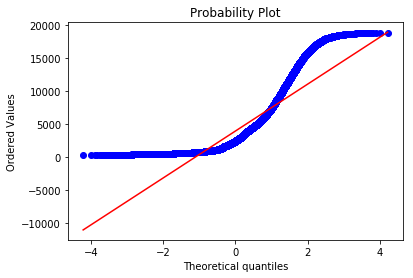

In [56]:
#Probability plot or QQ plot to see linear fit 
from scipy import stats
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

In [57]:
# Tukey IQR method 
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [58]:
tukey_indices, tukey_values = find_outliers_tukey(df['price'])
print(np.sort(tukey_values))

[11886 11886 11888 ... 18806 18818 18823]


These are our given outliers

**It's not perfect but, we can see that samples are scattered now. They are no more skewed**

# 10) Splitting dataset into train and test set

In [59]:
X = df.drop(['price'], axis=1)
y = df['price']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

## Scaling before modeling

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 11) Modeling

In [62]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

### i- Linear Regression

In [63]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
y_pred = clf_lr.predict(X_test)

In [65]:
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [66]:
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

####### Linear Regression #######
Score : 0.8786
[0.87929305 0.88488606 0.87653915 0.88325309 0.8642412 ]


In [67]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

In [68]:
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

MSE    : 1947979.61 
MAE    : 936.23 
RMSE   : 1395.70 
R2     : 0.88 


### ii-Lasso Regression

In [69]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
y_pred = clf_la.predict(X_test)

In [71]:
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [72]:
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

###### Lasso Regression ######
Score : 0.8637
[0.86441889 0.87115189 0.86613118 0.87111204 0.81619755]


In [73]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

In [74]:
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)

MSE    : 2186986.91 
MAE    : 914.56 
RMSE   : 1478.85 
R2     : 0.86 


### iii-AdaBosst Regression

In [75]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=1000, random_state=None)

In [76]:
y_pred = clf_ar.predict(X_test)

In [77]:
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished


In [78]:
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

###### AdaBoost Regression ######
Score : 0.8360
[0.87612048 0.88069423 0.89514702 0.85254088 0.85436268]


In [79]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


MSE    : 2631834.94 
MAE    : 1395.60 
RMSE   : 1622.29 
R2     : 0.84 


### iv-Ridge Regression

In [80]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [81]:
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

###### Ridge Regression ######
Score : 0.7498
[0.74744793 0.75483946 0.75750205 0.75883058 0.73678479]


In [82]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


MSE    : 4014637.33 
MAE    : 1351.87 
RMSE   : 2003.66 
R2     : 0.75 


### v-GradientBoosting Regression

In [83]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1    14051839.1315            0.79s
         2    12480697.4812            0.64s
         3    11152086.3112            0.58s
         4     9988722.3522            0.58s
         5     9015709.3768            0.57s
         6     8150433.6170            0.56s
         7     7417155.5891            0.54s
         8     6780314.7428            0.56s
         9     6229167.6621            0.56s
        10     5753427.1987            0.55s
        20     3213473.9656            0.46s
        30     2401407.1039            0.38s
        40     2107682.1497            0.32s
        50     1928666.4302            0.28s
        60     1793222.3199            0.23s
        70     1690634.9735            0.17s
        80     1610777.5515            0.12s
        90     1548556.7189            0.06s
       100     1499170.0066            0.00s
      Iter       Train Loss   Remaining Time 
         1    14058391.6387            0.49s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [84]:
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

###### Gradient Boosting Regression #######
Score : 0.9030
[0.90080492 0.90919531 0.90355255 0.90669799 0.90112788]


In [85]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


MSE    : 1557268.93 
MAE    : 725.40 
RMSE   : 1247.91 
R2     : 0.90 


### vi- RandomForest Regression

In [86]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished


In [87]:
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

###### Random Forest ######
Score : 0.9785
[0.98049097 0.97929674 0.97699562 0.97674322 0.9788314 ]


In [88]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 345420.84 
MAE    : 286.47 
RMSE   : 587.73 
R2     : 0.98 


### Tuning Parameters

In [89]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9808
R2     : 0.98 


### vii-KNeighbours Regression

In [90]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished



###### KNeighbours Regression ######
Score : 0.9542
[0.95230451 0.95643121 0.95568938 0.95573632 0.95352422]


In [91]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 735695.09 
MAE    : 436.02 
RMSE   : 857.73 
R2     : 0.95 


### Tuning Parameters

In [92]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9542
R2     : 0.95 


# 12) Visualizing R2-Score of Algorithms

In [93]:
compare = pd.DataFrame({'MODEL' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,MODEL,R2-Scores
5,RandomForest Regression,0.980774
6,KNeighbours Regression,0.954154
4,GradientBoosting Regression,0.902957
0,Linear Regression,0.878609
1,Lasso Regression,0.863715
2,AdaBoost Regression,0.835994
3,Ridge Regression,0.749822


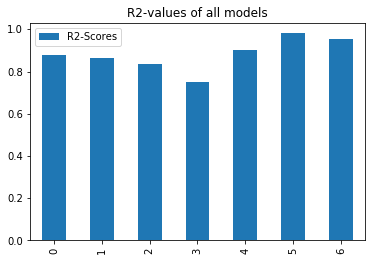

In [94]:
# Plotting RMSE 
compare.plot.bar(title = 'R2-values of all models')

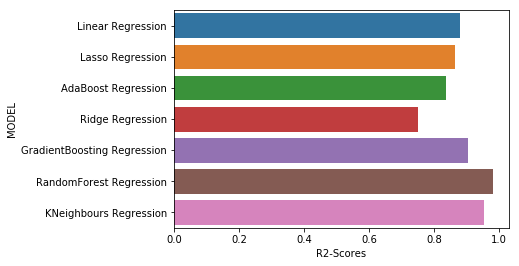

In [95]:
sns.barplot(x='R2-Scores' , y='MODEL' , data=compare)

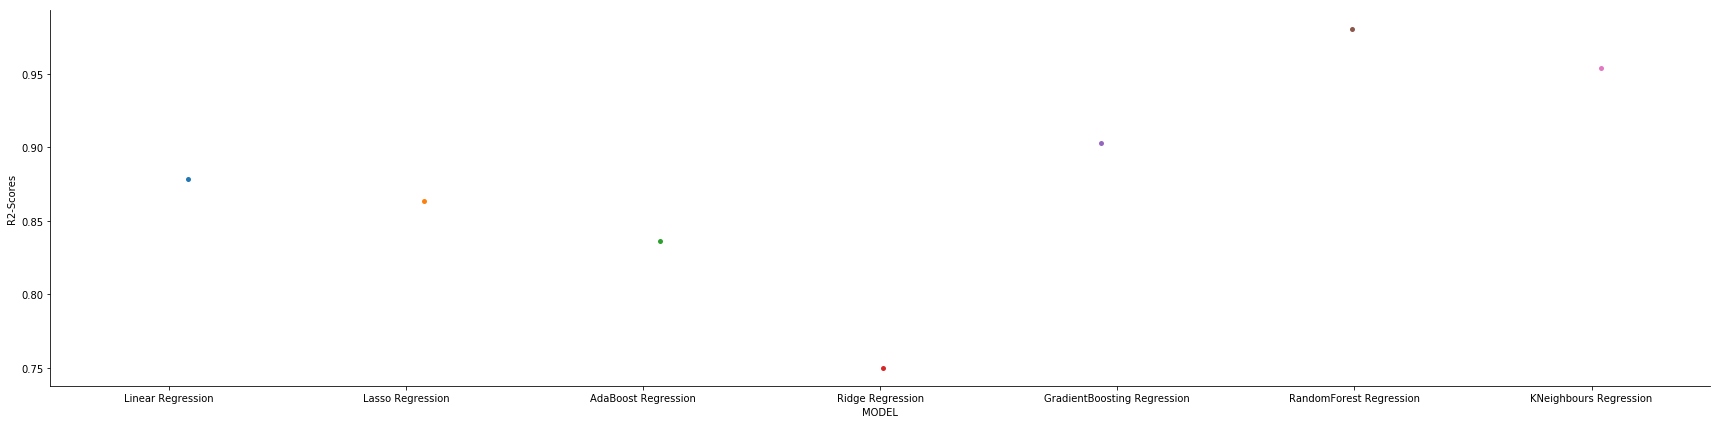

In [96]:
sns.catplot(x='MODEL', y='R2-Scores' , data=compare, height=6 , aspect=4)

**Random Forest is clear winner wit 98% of R2-score**

In [104]:
! pip install lightfm

  Stored in directory: C:\Users\Hassan\AppData\Local\pip\Cache\wheels\eb\bb\ac\188385a5da6627956be5d9663928483b36da576149ab5b8f79
Successfully built lightfm
